In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
!mkdir dataset
!wget "https://raw.githubusercontent.com/CulenS/Solar-Dataset/main/Solar%20Data%20Sheet_1.csv" -O dataset/SolarDataSheet1.csv

mkdir: cannot create directory ‘dataset’: File exists
--2024-05-18 18:31:03--  https://raw.githubusercontent.com/CulenS/Solar-Dataset/main/Solar%20Data%20Sheet_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180308 (176K) [text/plain]
Saving to: ‘dataset/SolarDataSheet1.csv’

dataset/SolarDataSh 100%[===================>] 176.08K  --.-KB/s    in 0.03s   

2024-05-18 18:31:03 (5.20 MB/s) - ‘dataset/SolarDataSheet1.csv’ saved [180308/180308]



In [5]:
df = pd.read_csv('/content/dataset/SolarDataSheet1.csv')
df.head()

,Clearness,GHI Actual,GHI Theoretical
0,0.49,346.49,380.406172
1,0.46,363.39,357.115998
2,0.52,341.15,403.696346
3,0.54,317.77,419.223128
4,0.51,320.05,395.932955


In [6]:
df['Error'] = df['GHI Actual'] - df['GHI Theoretical']
df.head()

,Clearness,GHI Actual,GHI Theoretical,Error
0,0.49,346.49,380.406172,-33.916172
1,0.46,363.39,357.115998,6.274002
2,0.52,341.15,403.696346,-62.546346
3,0.54,317.77,419.223128,-101.453128
4,0.51,320.05,395.932955,-75.882955


In [7]:
df['ABS Error'] = np.abs(df['Error'])
df.head()

,Clearness,GHI Actual,GHI Theoretical,Error,ABS Error
0,0.49,346.49,380.406172,-33.916172,33.916172
1,0.46,363.39,357.115998,6.274002,6.274002
2,0.52,341.15,403.696346,-62.546346,62.546346
3,0.54,317.77,419.223128,-101.453128,101.453128
4,0.51,320.05,395.932955,-75.882955,75.882955


In [8]:
df.isnull().sum()

Clearness          0
GHI Actual         0
GHI Theoretical    0
Error              0
ABS Error          0
dtype: int64

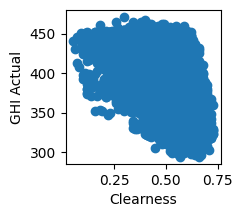

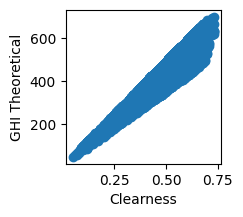

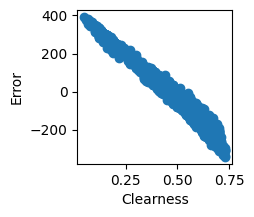

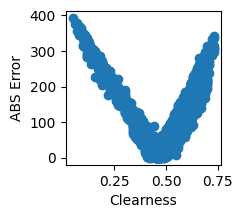

In [9]:
cols = df.columns.tolist()
cols.remove('Clearness')

for col in cols:
  plt.figure(figsize=(2, 2))
  plt.scatter(df['Clearness'], df[col])
  plt.xlabel('Clearness')
  plt.ylabel(col)
  plt.show()

In [10]:
df.corr()

,Clearness,GHI Actual,GHI Theoretical,Error,ABS Error
Clearness,1.000000,-0.469368,0.913501,-0.986898,0.020986
GHI Actual,-0.469368,1.000000,-0.106966,0.461582,-0.167000
GHI Theoretical,0.913501,-0.106966,1.000000,-0.931381,0.014605
Error,-0.986898,0.461582,-0.931381,1.000000,-0.074177
ABS Error,0.020986,-0.167000,0.014605,-0.074177,1.000000


In [15]:
X = df['Clearness']
X = X.values.reshape(-1, 1)
Y = df['Error']
Y = Y.values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 41)

In [16]:
X_train.shape

(6572, 1)

In [17]:
X_test.shape

(731, 1)

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, Y_train)

LinearRegression()

In [20]:
Y_pred = model.predict(X_test)

In [24]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('mae : ', mae)
print('mse : ', mse)
print('R2  :', r2)

mae :  14.977347553451692
mse :  405.87731841722575
R2  : 0.9732531159403837


In [25]:
c = model.intercept_
m = model.coef_[0]

print('intercept : ', c)
print('slope     : ', m)

intercept :  [449.29908028]
slope     :  [-981.1387123]


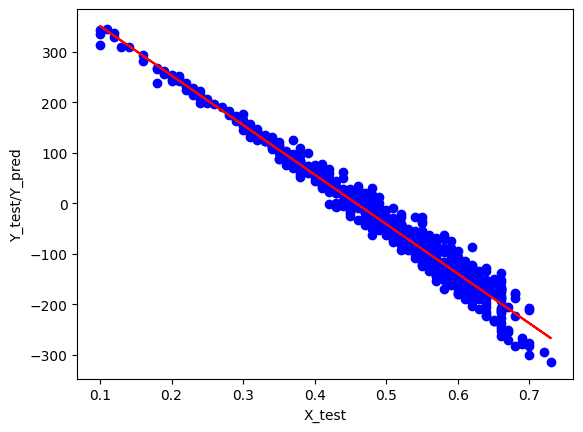

In [26]:
plt.scatter(X_test, Y_test, color = 'blue', label = 'Actual')
plt.plot(X_test, Y_pred, color = 'red', label = 'Prediction')
plt.xlabel('X_test')
plt.ylabel('Y_test/Y_pred')
plt.show()

In [33]:
print('The equation of line is:')
print('y =', m, 'x +', c)

The equation of line is:
y = [-981.1387123] x + [449.29908028]
